# CS 331 - PA1: Linear Regression and Polynomial Regression (40+80)






Before you start the assignment, here's an important clarification: this assignment is divided into two types of graded components—**Tasks** and **Questions**.

-  <span style="color: purple; font-size: 20px;">**Tasks**</span> (highlighted in purple) involve hands-on programming and require you to implement specific functionalities or solve problems using code.
-  <span style="color: green; font-size: 20px;">**Questions**</span> (highlighted in green) are focused on theoretical and analytical interpretation, requiring you to analyze, explain, or draw insights from the tasks you’ve completed.

Attempting both components is mandatory, as they are designed to complement each other.

**Note:** 
-  When working in Jupyter notebooks, avoid reusing the same variable names across different cells. This can cause overwriting and errors. To avoid this, try using more descriptive variable names to keep track of their purpose and prevent mix-ups. 

-  All cells in the notebook must be executed before submission and should display the expected results (graphs, plots, etc.). Any failure to run the cells and display the results will result in point deductions. Please ensure that the notebook is fully functional and the outputs are visible for review.

Best of luck with the assignment!

---

## **Part 1:** Univariate and Multivariate Linear Regression (40 marks)

<span style="color: red; font-size: 24px;">The Problem at Hand:</span>

In this assignment, you will be analyzing a dataset containing factors that influence student performance. The dataset includes several features, such as the number of hours studied, previous scores, extracurricular activities, sleep hours, and the number of sample question papers practiced. Your goal is to build a linear regression model that predicts a student's "Performance Index," which is the target variable in this dataset.

**Importing Libraries**

The following libraries have been imported for you to use in the assignment. You are not allowed to import any additional libraries without explicit consent from the TAs first. If you want to import any additional libraries, send a query on Slack.

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**Load and Inspect the Dataset**

Import your .csv file here

In [2]:
#Your code here
student_perf = pd.read_csv("student_perf.csv")
display(student_perf.head())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


**Data Preprocessing**

<span style="color: purple; font-size: 20px;">**Task 1.1:**</span>  In this task, you will:

-  Identify Missing Values: Use the isnull() method to check for missing values in the dataset and print the count of missing values for each column. Identifying and handling missing values ensures the integrity of your dataset.

-  Categorize Columns by Data Type: Group the columns by their data types (int, float, object, etc.) and display the count of columns for each data type.

-  Visualize Data Type Distribution: Generate a pie chart to visualize the distribution of different data types in the dataset.

**[2 Marks]**


Information about the dataset in terms of missing values and the data-types of each Column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hours Studied                      10000 non-null  int64  
 1    Previous Scores                   10000 non-null  int64  
 2    Extracurricular Activities        10000 non-null  object 
 3    Sleep Hours                       10000 non-null  int64  
 4    Sample Question Papers Practiced  10000 non-null  int64  
 5    Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)None

Count of Columns by Data-Types:

int64      4
object     1
float64    1
Name: count, dtype: int64

A pie chart representation of the distibution of the data-types in the dataset:



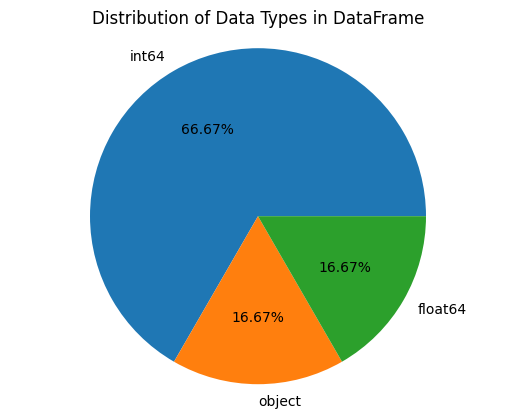

In [3]:
#Your code here
print("\nInformation about the dataset in terms of missing values and the data-types of each Column:\n")
print(student_perf.info(memory_usage=False))

print("\nCount of Columns by Data-Types:\n")
print(student_perf.dtypes.value_counts())

print("\nA pie chart representation of the distibution of the data-types in the dataset:\n")
dtypes = student_perf.dtypes.value_counts().to_dict()
plt.pie(dtypes.values(), labels=dtypes.keys(), autopct="%.2f%%")
plt.title("Distribution of Data Types in DataFrame")
plt.axis('equal') 
plt.show()


<span style="color: purple; font-size: 20px;">**Task 1.2:**</span> In this task, you are required to implement a custom **MyOneHotEncoder** class that performs one-hot encoding on categorical variables in the dataset. The class could include the following methods:

-  **fit:** This method identifies the unique values for each categorical column and stores them for later use. It takes in the dataframe and a list of categorical columns.

-  **transform:** This method performs the actual one-hot encoding on the dataframe. It converts each categorical column into multiple binary columns, where each new column represents one category of the original column. If a column has only two categories, it will be encoded into a single binary column.

-  **fit_transform:** This method combines fit and transform into a single step for convenience, encoding the categorical columns in the dataset.


**Note:** Be sure to apply the class to the categorical features in your data as well


**[5 Marks]**

In [4]:
#Your code here
class MyOneHotEncoder:
    def __init__(self):
        self.categorical_columns = {}
    
    def fit(self, df: pd.DataFrame, catgeorical_columns: pd.DataFrame):
        for col in catgeorical_columns:
            self.categorical_columns[col] = df[col].unique()
    
    def tranform(self, df: pd.DataFrame, catgeorical_columns: pd.DataFrame):
        df_encoded = df.copy()
        for col in categorical_columns:
            for unique_labels in self.categorical_columns[col]:
                df_encoded[f"{col}_{unique_labels}"] = (df_encoded[col] == unique_labels).astype(int)
            df_encoded.drop(columns=col, inplace=True)
        return df_encoded
    
    def fit_transform(self, df: pd.DataFrame, catgeorical_columns: pd.DataFrame):
        self.fit(df, categorical_columns)
        return self.tranform(df,categorical_columns)

encoder = MyOneHotEncoder()
categorical_columns = student_perf.select_dtypes(include=['category', 'object'])
student_perf_encoded = encoder.fit_transform(student_perf,categorical_columns)
student_perf_encoded.columns = student_perf_encoded.columns.str.strip()
student_perf_encoded = student_perf_encoded.drop(columns='Extracurricular Activities_ No')
display(student_perf_encoded.describe().round(1))


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_ Yes
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5.0,69.4,6.5,4.6,55.2,0.5
std,2.6,17.3,1.7,2.9,19.2,0.5
min,1.0,40.0,4.0,0.0,10.0,0.0
25%,3.0,54.0,5.0,2.0,40.0,0.0
50%,5.0,69.0,7.0,5.0,55.0,0.0
75%,7.0,85.0,8.0,7.0,71.0,1.0
max,9.0,99.0,9.0,9.0,100.0,1.0


<span style="color: purple; font-size: 20px;">**Task 1.3:**</span> In this task, you are required to implement a custom class, MyStandardScaler, to standardize the data (z-score, min/max depending on the data).

You are also required to define a global function for computing the mean squared error between two np arrays.

**Note:** Do not apply the normalisation or the MSE func to the data yet


**[3 Marks]**


In [5]:
#Your code here
def compute_mse(y_true: np.ndarray, y_pred: np.ndarray):
    return (np.mean((y_true - y_pred)**2))

In [6]:
#Your code here
class MyStandardScaler:
    def __init__(self):
        self.mean = {}
        self.sd = {}
    
    def fit(self, df: pd.DataFrame):
        for col in df.columns:
            self.mean[col] = np.mean(df[col])
            self.sd[col] = np.std(df[col])
            
    def transform(self, df: pd.DataFrame):
        df_scaled = df.copy()
        for col in df.columns:
            df_scaled[col] = (df[col] - self.mean[col]) / (self.sd[col])
        return df_scaled
    
    def fit_transform(self, df: pd.DataFrame):
        self.fit(df)
        return self.transform(df)

<span style="color: green; font-size: 20px;">**Question 1a:**</span> Choice of Scaler class (z-score, min/max)? Justify your choice (you can give justification in the form of a plot as well)

**[2 Mark]**


**Answer:**

Standardization Keeps the distribution of each feature. It keeps the relative relationship intact. It also acknowledges any outliers in the data.

In [7]:
scaler = MyStandardScaler()
features_to_scale = student_perf_encoded.drop(columns=['Performance Index', 'Extracurricular Activities_ Yes'])
features_to_scale = scaler.fit_transform(features_to_scale)
demo_pd= pd.concat([features_to_scale, student_perf_encoded[['Performance Index', 'Extracurricular Activities_ Yes']]], axis=1)

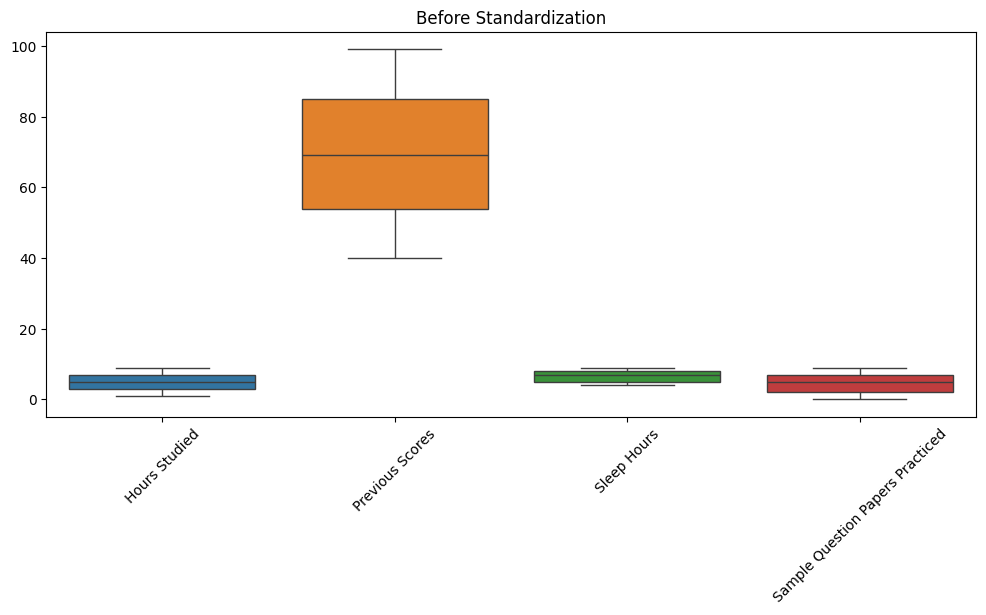

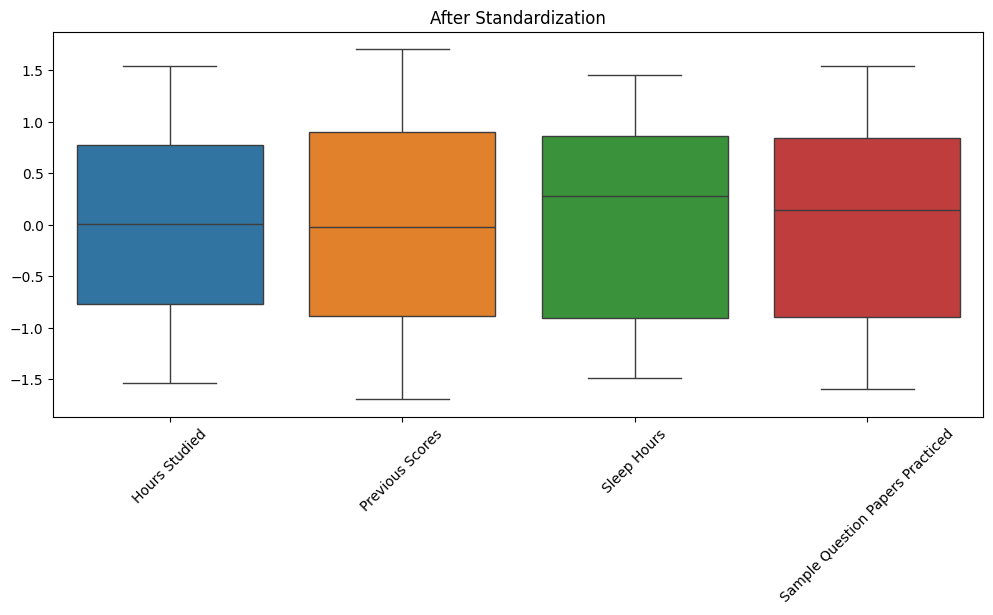

In [8]:
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

# Before standardization
plt.figure(figsize=(12, 5))
sns.boxplot(data=student_perf_encoded[numeric_columns])
plt.title("Before Standardization")
plt.xticks(rotation=45)
plt.show()

# After standardization
plt.figure(figsize=(12, 5))
sns.boxplot(data=demo_pd[numeric_columns])
plt.title("After Standardization")
plt.xticks(rotation=45)
plt.show()

---

<span style="font-size: 28px;">**Linear Regression Using Gradient Descent**</span>



In this task, you will implement **linear regression** using **gradient descent**, an iterative optimization algorithm used to minimize the error between predicted and actual values. Instead of computing a direct closed-form solution, you will iteratively adjust the model parameters to minimize the loss function.  

### **Algorithmic Basis**  

Linear regression models the relationship between input features $X$ and target values $y$ using the equation:  

$$
y = W_0 + W_1 X_1 + W_2 X_2 + \dots + W_n X_n
$$  

where $W$ represents the model parameters (weights). The goal is to find the optimal values of $W$ that minimize the **Mean Squared Error (MSE)** loss function:  

$$
\text{Loss} = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$  

To achieve this, you will update the model parameters iteratively using **gradient descent**, which adjusts $W$ in the direction that reduces the loss. The update rule for gradient descent is:  

$$
W := W - \alpha \frac{1}{m} X^T (XW - y)
$$  

where:  
- $\alpha$ is the **learning rate**, controlling the step size,  
- $m$ is the number of training samples,  
- $X^T$ is the transposed feature matrix,  
- $(XW - y)$ represents the prediction error.  

You will also track the loss at each iteration to visualize how the model improves over time. 


<span style="color: purple; font-size: 20px;">**Task 1.4:**</span> Implement a **LinearRegression** class that performs linear regression using gradient descent. 
-  This class should be generalizable, capable of handling both univariate and multivariate regression seamlessly.
-  Ensure that the implementation is **fully vectorized to optimize performance**. This means computations (e.g., weight updates) should be handled using matrix operations, avoiding explicit loops wherever possible.



**Note:** You might find it helpful to add a function for plotting the training loss **within** your LR class

**[5 Marks]**


In [9]:
#Your code here
class LinearRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None
        self.loss = []

    def gradient_descent(self, split_scaled_X: pd.DataFrame, split_y: pd.DataFrame):
        split_scaled_X = np.array(split_scaled_X).astype(np.float64)
        split_y = np.array(split_y).astype(np.float64)
        m, n = split_scaled_X.shape
        split_scaled_X = np.column_stack((np.ones((m, 1)), split_scaled_X))
        self.W = np.random.randn(n + 1, 1)
        for i in range(self.iterations):
            y_pred = split_scaled_X @ self.W
            gradient = (split_scaled_X.T @ (y_pred - split_y))/m
            self.W -= self.learning_rate * gradient
            loss = 0.5 * compute_mse(split_y, y_pred)
            self.loss.append(loss)
    
    def predict(self,split_scaled_X: pd.DataFrame) -> np.ndarray:
        split_scaled_X = np.array(split_scaled_X)
        m = split_scaled_X.shape[0]
        split_scaled_X = np.column_stack((np.ones((m,1)),split_scaled_X))
        return (split_scaled_X@self.W)
    
    def plot_loss(self):
        plt.plot(range(self.iterations), self.loss, label="Training Loss")
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Reduction Over Time')
        plt.grid()
        plt.legend()
        plt.show()

<span style="font-size: 20px;">**a) Univariate Regression**</span>


**Feature Selection**


<span style="color: purple; font-size: 20px;">**Task 1.5:**</span> Visualize the correlations between features and the target variable to understand their relationships.

-  Compute the correlation of each feature with the target variable.
-  Create a bar plot to display the absolute correlations of each feature with the target variable
-  Generate a heatmap of the correlation matrix to visualize the pairwise correlations between all features and the target variable

**Note:** Select the **best performing feature** and use that in the tasks ahead.

**[3 Marks]**

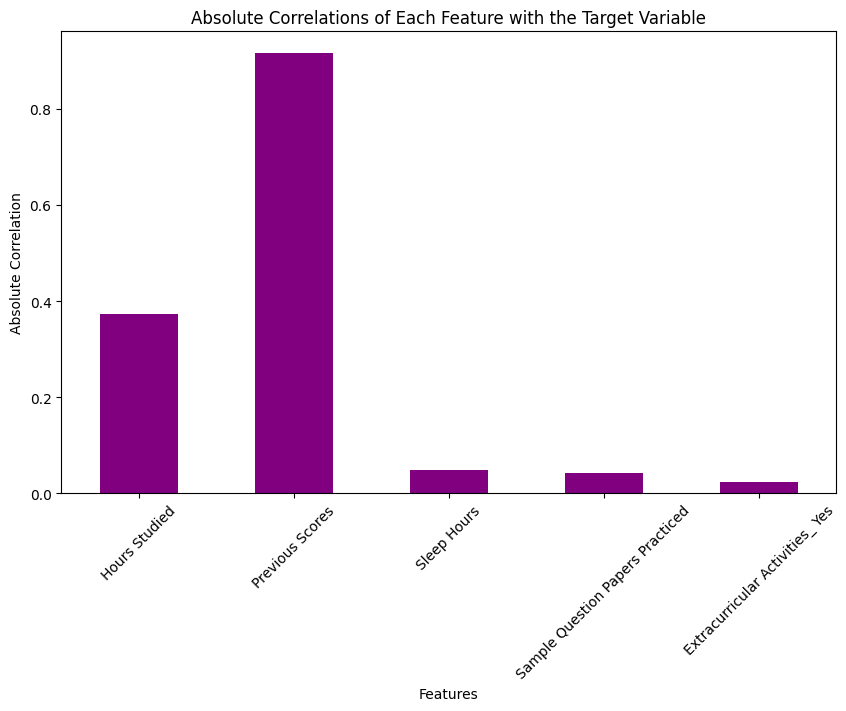

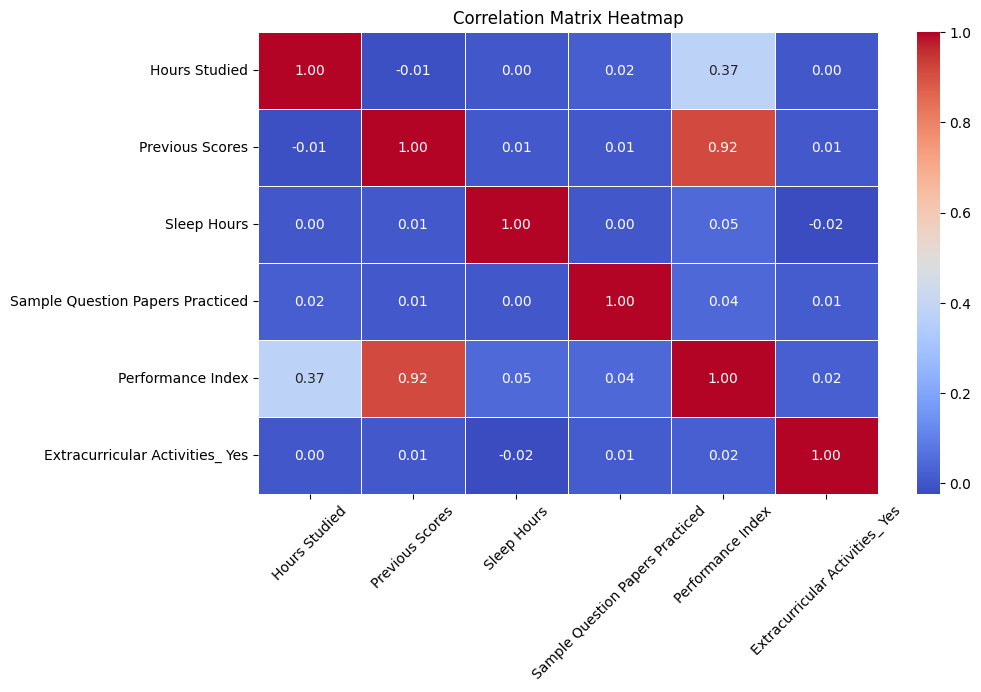

In [10]:
#Your code here
correlation_matrix = student_perf_encoded.corr()
correlation_with_target = correlation_matrix['Performance Index'].drop('Performance Index')
correlation_with_target_abs = correlation_with_target.abs()

plt.figure(figsize=(10, 6))
correlation_with_target_abs.plot(kind='bar', color='purple')
plt.title('Absolute Correlations of Each Feature with the Target Variable')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()

<span style="color: green; font-size: 20px;">**Question 1b:**</span> What would a negative correlation indicate between the feature and the target variable?  

**[2 Marks]**


**Answer:**

<span style="color: green; font-size: 20px;">**Question 1c:**</span> What does it mean when the correlation value is close to zero between a feature and the target variable?

**[2 Marks]**


**Answer:**



<span style="color: green; font-size: 20px;">**Question 1d:**</span> How can the correlation coefficient help in identifying important features for prediction models? What are the limitations of using only correlation to select features?

**[2 Marks]**


**Answer:**

<span style="color: purple; font-size: 20px;">**Task 1.6:**</span> In this part, extract the selected feature and target variable from the dataset. Split the data into training and testing sets (80-20 split). Use the custom MyStandardScaler to standardize both the training and testing data (Hint: be mindful about which splits of your data you are scaling)


[train_test_split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**[2 Marks]**


In [11]:
#Your code here
y = student_perf_encoded[['Performance Index']]
X = student_perf_encoded[['Previous Scores']]
features_selected = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = pd.DataFrame(X_train)
X_test  = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train) 
y_test = pd.DataFrame(y_test)
scaler = MyStandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<span style="color: purple; font-size: 20px;">**Task 1.7:**</span> In this task, you need to follow these steps:

-  Initialize the LinearRegression model with appropriate hyperparameters.
-  Fit the model, then use it to make predictions on the standardized test data.
-  Calculate the Mean Squared Error (MSE) between the predicted and actual values.
-  Plot the loss function to visualize the model’s convergence during training.
-  Visualize the performance of the model by plotting its predictions against the actual data for both training and test sets. Ensure the plots include appropriate labels, titles, legends, and a grid for clear interpretation.

**[4 Marks]**


The Bias error is: 60.20085746537165
The Variance error is: 58.94920934171646


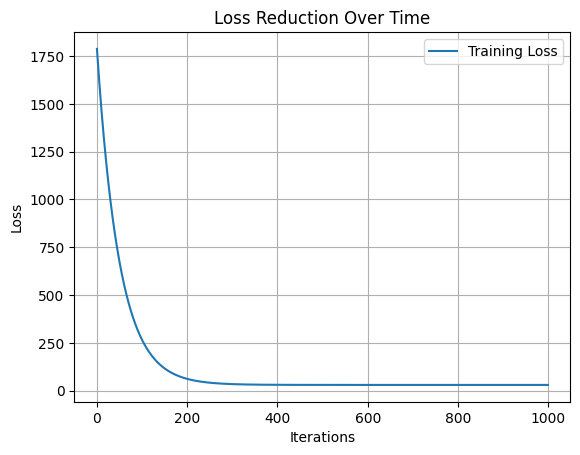

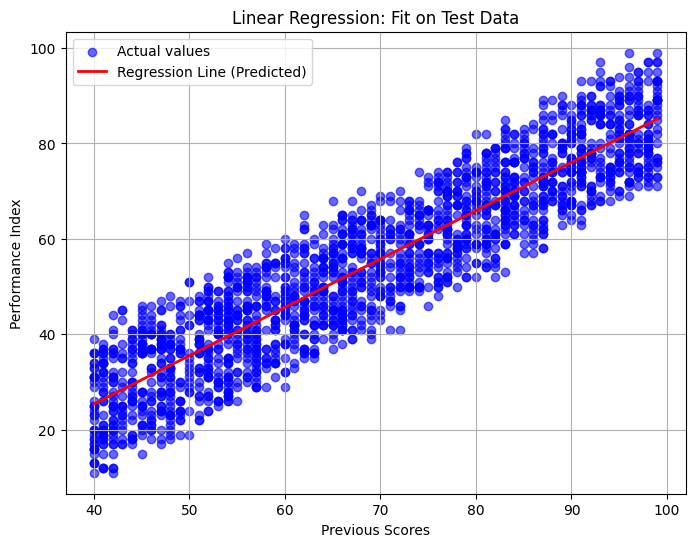

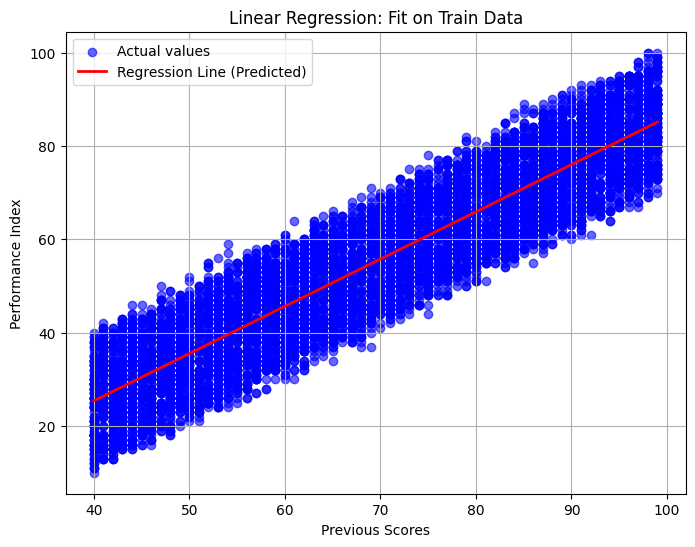

In [12]:
#Your code here
regression = LinearRegression(learning_rate=0.01, iterations=1000)
regression.gradient_descent(X_train_scaled,y_train)

y_pred_test = regression.predict(X_test_scaled)
y_pred_train = regression.predict(X_train_scaled)

variance = compute_mse(y_test,y_pred_test)
bias = compute_mse(y_train,y_pred_train)
print(f"The Bias error is: {bias}")
print(f"The Variance error is: {variance}")

regression.plot_loss()
sorted_test_idx = np.argsort(np.array(X_test).reshape(-1))
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual values')
plt.plot((np.array(X_test).reshape(-1))[sorted_test_idx], y_pred_test[sorted_test_idx], 
         color='red', linewidth=2, label='Regression Line (Predicted)')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Linear Regression: Fit on Test Data')
plt.legend()
plt.grid(True)
plt.show()

sorted_train_idx = np.argsort(np.array(X_train).reshape(-1))
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Actual values')
plt.plot((np.array(X_train).reshape(-1))[sorted_train_idx], y_pred_train[sorted_train_idx], 
         color='red', linewidth=2, label='Regression Line (Predicted)')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Linear Regression: Fit on Train Data')
plt.legend()
plt.grid(True)
plt.show()


<span style="color: purple; font-size: 20px;">**Task 1.8:**</span>

-  Print the learned intercept (bias) parameter of the univariate regression model.
-  Print the learned gradient (weight) parameter associated with the selected feature used in the regression model.

**[1 Mark]**


In [13]:
#Your code here
print(f"Learned intercept (bias) parameter = {regression.W[0][0]:.4f}")
for i, feature in enumerate(features_selected):
    weight = regression.W[i + 1][0] 
    print(f"Learned weight parameter for '{feature}' = {weight:.4f}")

Learned intercept (bias) parameter = 55.3091
Learned weight parameter for 'Previous Scores' = 17.5626


<span style="font-size: 20px;">**b) Multivariate Regression**</span>


<span style="color: purple; font-size: 20px;">**Task 1.9:**</span> While univariate regression focuses on a single feature to predict the target, multivariate regression involves multiple features to predict the target variable. You will use similar steps as univariate regression, but here you need to handle multiple input features and ensure they are properly scaled before fitting the model.

-  Define the features and target variable (y) from the dataset.
-  Split the dataset into training and testing sets using train_test_split, with an 80-20 split for training and testing data.
-  Standardize using the MyStandardScaler class you implemented earlier. 

**[3 Marks]**


In [14]:
#Your code here
X = student_perf_encoded[['Hours Studied', 'Previous Scores']]
features_selected = list(X.columns)
y = student_perf_encoded[['Performance Index']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = pd.DataFrame(X_train)
X_test  = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train) 
y_test = pd.DataFrame(y_test)
scaler = MyStandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<span style="color: purple; font-size: 20px;">**Task 1.10:**</span> For this part, you'll implement and train a multivariate linear regression model. 

-  Fit the model.

-  Make predictions on the test data and evaluate the model's performance using the Mean Squared Error (MSE). 

-  Visualize the loss during training to understand how the model converged over the epochs.

**[3 Marks]**


The Bias error is: 5.209481617290925
The Variance error is: 5.24149165394456


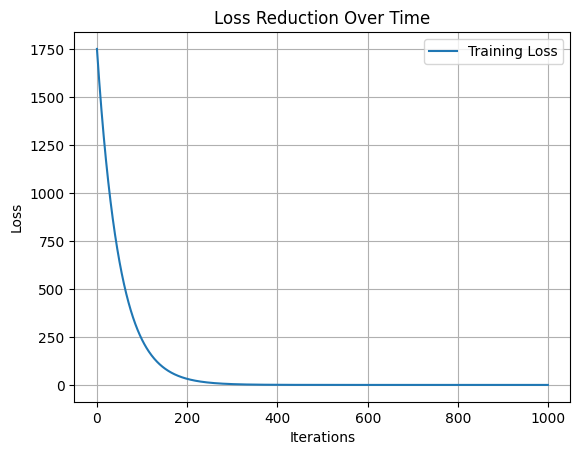

In [15]:
#Your code here
regression = LinearRegression(learning_rate=0.01, iterations=1000)
regression.gradient_descent(X_train_scaled,y_train)
y_pred_test = regression.predict(X_test_scaled)
y_pred_train = regression.predict(X_train_scaled)
variance = compute_mse(y_test,y_pred_test)
bias = compute_mse(y_train,y_pred_train)
print(f"The Bias error is: {bias}")
print(f"The Variance error is: {variance}")
regression.plot_loss()

<span style="color: purple; font-size: 20px;">**Task 1.11:**</span>
-  Print the learned bias term (intercept) parameter of the multivariate regression model.
-  Print the learned gradients (weights) associated with each feature used in the multivariate regression model.

**[1 Mark]**


In [16]:
#Your code here
print(f"Learned intercept (bias) parameter = {regression.W[0][0]:.4f}")
for i, feature in enumerate(features_selected):
    weight = regression.W[i + 1][0] 
    print(f"Learned weight parameter for '{feature}' = {weight:.4f}")

Learned intercept (bias) parameter = 55.3091
Learned weight parameter for 'Hours Studied' = 7.4156
Learned weight parameter for 'Previous Scores' = 17.6431


---

---

## **Part 2:** Stock Price Prediction: Polynomial Regression Using Time-Series Data 📈📈 (80 Marks)


![Alt text](2.jpg)

This part of your assignment focuses on processing time-series data and building simple polynomial regression models.
You shall also be reviewing and analysing some of the theoretical implications of your findings.

---

<span style="color: red; font-size: 24px;">The Problem at Hand:</span>


**Intellinetics**' stock prices have shown fluctuations over time, and your task is to analyze these trends using historical data. In this assignment, you'll work with time-series stock data, focusing on preprocessing and extracting meaningful patterns. You'll apply polynomial regression models to capture the underlying trends and predict future stock prices. By experimenting with different polynomial degrees and optimization techniques, you'll evaluate how well these models fit the data and assess their predictive accuracy.

---

**Importing Required Libraries**


You are not allowed to import any other libraries except the ones provided below (Consult the TA's if there is any confusion in this regard):

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load and Inspect the Dataset**

Import your .csv file here

In [18]:
#Your code here
INLX = pd.read_csv('INLX.csv')
INLX.columns = INLX.columns.str.strip()
display(INLX.head(10))

,Date,Close/Last
0,2019-11-08,$5.03
1,2019-11-09,$4.90
2,2019-11-10,$5.47
3,2019-11-11,$5.94
4,2019-11-12,$6.10
5,2019-11-13,$5.81
6,2019-11-14,$6.17
7,2019-11-15,$6.51
8,2019-11-16,$6.31
9,2019-11-17,$6.93


**Preprocessing**

<span style="color: purple; font-size: 20px;">**Task 2.1:**</span> Preprocess the stock price dataset to prepare it for analysis.

After preprocessing, the dataset should:

-  Have numeric values for relevant columns
-  Be sorted chronologically by date.
-  Include a new column representing time in days since the earliest date.

Display the processed dataset showing columns such as Date, Time, and Close/Last.

**[2 Marks]**


In [19]:
#Your code here
def preprocess_stock_data(df: pd.DataFrame) -> pd.DataFrame:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Close/Last'] = df['Close/Last'].astype(str).str.replace('$','').astype(float)
    df.sort_values(by='Date')
    df['Time'] = (df['Date'] - df['Date'].min()).dt.days
    return df[['Date', 'Time', 'Close/Last']]

INLX = preprocess_stock_data(INLX)
INLX.head()

,Date,Time,Close/Last
0,2019-11-08,0,5.03
1,2019-11-09,1,4.90
2,2019-11-10,2,5.47
3,2019-11-11,3,5.94
4,2019-11-12,4,6.10


**Feature Selection and Splitting the Dataset**

<span style="color: purple; font-size: 20px;">**Task 2.2:**</span> Select the features (time) and target variable (closing price) and then split the dataset into training and testing sets with an 80-20 ratio, ensuring that earlier data is used for training and later data for testing. Finally, print the number of samples in each set to confirm the split.

**Note:** You cannot use sklearn's test-train-split method for this. You need to perform a **sequential split** on the dataset to preserve the time order. 

**[3 Marks]**


In [20]:
#Your code here
split_size = int(0.8 * len(INLX['Time']))
train_X = INLX['Time'].iloc[:split_size]
train_y = INLX['Close/Last'].iloc[:split_size]
test_X = INLX['Time'].iloc[split_size:]
test_y = INLX['Close/Last'].iloc[split_size:]
train_X = pd.DataFrame(train_X)
train_y =  pd.DataFrame(train_y)
test_X = pd.DataFrame(test_X)
test_y =  pd.DataFrame(test_y)
display(train_X.info())
display(test_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Time    1530 non-null   int64
dtypes: int64(1)
memory usage: 12.1 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 1530 to 1912
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Time    383 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


None

<span style="color: purple; font-size: 20px;">**Task 2.3:**</span> 

-  Conduct standardization of your data using your custom scaler class from the previous part (if required)

-  Visualize the distribution of training and test data points to understand how they are split across the entire dataset. Plot a scatter plot with training data points in blue and test data points in red, including labels, a title, and grid lines.

**[2 Marks]**


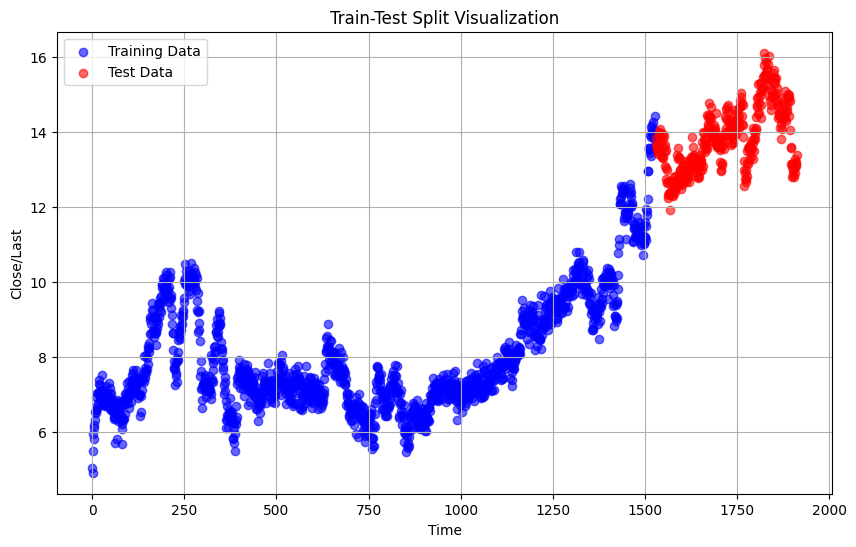

In [21]:
#Your code here
scaler = MyStandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

plt.figure(figsize=(10, 6))
plt.scatter(train_X, train_y, color='blue', label='Training Data', alpha=0.6)
plt.scatter(test_X, test_y, color='red', label='Test Data', alpha=0.6)
plt.title('Train-Test Split Visualization')
plt.xlabel('Time')
plt.ylabel('Close/Last')
plt.legend()
plt.grid(True)
plt.show()

**Simple Linear Regression using your class from the first part**

<span style="color: purple; font-size: 20px;">**Task 2.4:**</span> Lets first train a simple regression model to predict the closing price based on time. Compute and report the Mean Squared Error (MSE) to assess the model’s performance. Finally, visualize the model's predictions against the actual target values to analyze its fit.


This will help you get a gist of the task at hand. You are allowed to use your class from the first part for this.

**[2 Marks]**

The Bias error is: 1.9140821740289307
The Variance error is: 16.603590314830335


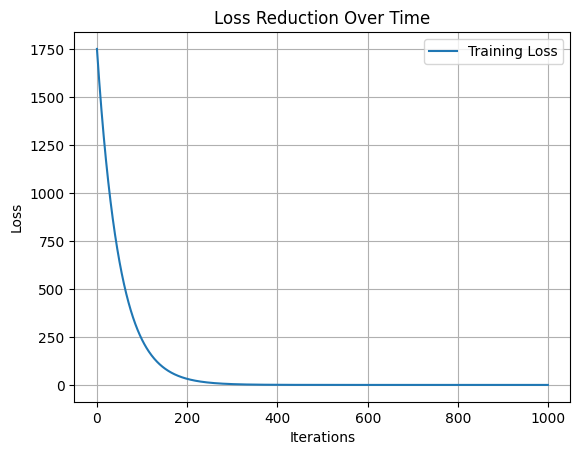

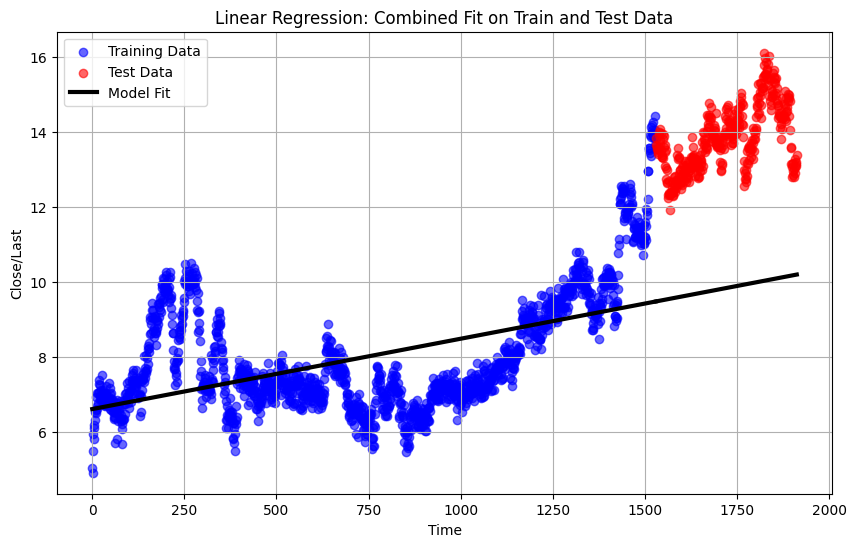

In [22]:
#Your code here
linear_model = LinearRegression(0.01,1000)

linear_model.gradient_descent(train_X_scaled, train_y)

y_test_pred = linear_model.predict(test_X_scaled)
y_train_pred = linear_model.predict(train_X_scaled)

bias = compute_mse(train_y,y_train_pred)
variance = compute_mse(test_y,y_test_pred)
print(f"The Bias error is: {bias}")
print(f"The Variance error is: {variance}")

regression.plot_loss()

plt.figure(figsize=(10, 6))
sorted_train_idx = np.argsort(np.array(train_X).reshape(-1))
sorted_test_idx = np.argsort(np.array(test_X).reshape(-1))
plt.scatter(train_X, train_y, color='blue', alpha=0.6, label='Training Data')
plt.scatter(test_X, test_y, color='red', alpha=0.6, label='Test Data')
plt.plot(np.array(train_X).reshape(-1)[sorted_train_idx], 
         y_train_pred[sorted_train_idx], 
         color='black', linewidth=3,)
plt.plot(np.array(test_X).reshape(-1)[sorted_test_idx], 
         y_test_pred[sorted_test_idx], 
         color='black', linewidth=3, label='Model Fit')
plt.xlabel('Time')
plt.ylabel('Close/Last')
plt.title('Linear Regression: Combined Fit on Train and Test Data')
plt.legend()
plt.grid(True)
plt.show()

<span style="color: green; font-size: 20px;">**Question 2a:**</span> What are **two** limitations of using linear regression for tasks like stock price prediction, and what are the underlying reasons behind these limitations?

**[2 Marks]**


Answer:

<span style="font-size: 28px;">**Polynomial Regression**</span>




Polynomial regression extends linear regression by introducing higher-degree terms (powers of the input variables). Instead of fitting a straight line, polynomial regression fits a curve to the data, allowing for the capture of more complex relationships. By using polynomial features, the model can adjust to this complexity, often leading to a more accurate understanding of underlying trends.

### Algorithmic Basis

In polynomial regression, the predictor variable $X$ is raised to higher powers. In its simplest form, a linear regression model predicts the dependent variable $y$ as a weighted sum of the input features:

$$
y = W_0 + W_1 X
$$

Where $W_0$ is the intercept and $W_1$ is the coefficient of the feature $X$.

In polynomial regression, we extend this idea by adding higher-order terms of the feature $X$. For a polynomial of degree $d$, the model becomes:

$$
y = W_0 + W_1 X + W_2 X^2 + W_3 X^3 + \dots + W_d X^d
$$

Here, $X^2, X^3, \dots, X^d$ represent higher powers of the input variable, and the coefficients $W_1, W_2, \dots, W_d$ are learned during the training process.

**Note:**

A key aspect of this technique is converting the input feature $X$ into polynomial features up to the desired degree $d$. For example, if 

$$
X = [x_1, x_2, x_3]
$$

and the degree is 2, the transformed feature matrix will include 

$$
X = [x_1, x_1^2, x_2, x_2^2, x_3, x_3^2]
$$


---
### Polynomial Regression Using the Least Squares Method  

In this task, you will implement polynomial regression using the least squares approach, also referred to as the pseudoinverse, analytical, or closed-form solution. These terms will be used interchangeably throughout the task.  

### Algorithmic Basis  

The least squares method provides a direct solution to the problem of finding the optimal weights for polynomial regression by minimizing the sum of squared errors. Given a dataset with input features $X$ and corresponding target values $y$, the polynomial regression model extends linear regression by incorporating higher-order terms of $X$.  

For a polynomial of degree $d$, the model is represented as:  

$$
y = W_0 + W_1 X + W_2 X^2 + \dots + W_d X^d
$$  

This requires transforming the input feature $X$ into a polynomial feature matrix. The closed-form solution for estimating the weight vector $W$ is given by:  

$$
W = (X^T X)^{-1} X^T y
$$  

where:  
- $X$ is the transformed feature matrix including polynomial terms,  
- $X^T$ is its transpose,  
- $(X^T X)^{-1}$ is the inverse of the square matrix,  
- and $y$ is the target variable.  

Using this method, we obtain the optimal weight vector in a single computation, avoiding iterative updates as seen in gradient-based optimization methods.  

---

<span style="color: purple; font-size: 20px;">**Task 2.5:**</span> You are required to implement a polynomial regression class using the least squares method. Your class should be capable of: 

- Handling polynomial transformations of input data,  
- Computing the optimal weights using the closed-form solution,  
- Making predictions based on the learned weights.  

**[6 Marks]**



In [23]:
#Your code here
class PolynomialRegressionLS:
    pass


<span style="color: purple; font-size: 20px;">**Task 2.6:**</span> You are required to train a custom polynomial regression model using the class you made above. Be sure to do the following:

-  Implement and train a polynomial regression model using the Least Squares method.
-  Set the degree of the polynomial and fit the model to the training data.
-  Output the model's coefficients after training.
-  Predict the target values using the test data and compute the Mean Squared Error (MSE).
-  Plot the actual vs predicted values on a scatter plot. Label the plot appropriately with axes titles and a legend.

**[4 Marks]**



In [24]:
#Your code here

---


<span style="color: purple; font-size: 20px;">**Task 2.7:**</span> Now, implement a polynomial regression model using an iterative approach (**PolynomialRegressionIter**) with gradient descent. Be sure to do the following:

-  The class should take input parameters for the polynomial degree, learning rate, and number of iterations.

-  The model should iteratively update the weights to minimize the loss function, which measures the error between the predicted and actual values.

-  Implement a method to transform the input features into polynomial terms, including the bias term and higher-degree terms up to the specified polynomial degree. This transformation will be used for both training and prediction.

-  The loss during each iteration should be tracked to monitor the progress of the optimization process. You'll need to use this loss track for later tasks

-  The model should be able to make predictions based on the learned weights after training.


**Note:** Make sure your graphs' axes are labelled correctly and include legends in your plots wherever required

**[6 Marks]**



In [25]:
#Your code here
class PolynomialRegressionIter:
   pass

<span style="color: purple; font-size: 20px;">**Task 2.8:**</span> Train a custom polynomial regression model using the class you made above, and your chosen hyperparameters (you can fine-tune these). Also be sur eto do the following:

-  Print the learned weights (coefficients) of the model after training.

-  Plot the loss over iterations to visualize the model's convergence during training. To do this you have to ensure the loss is tracked during the gradient descent process.

-  After training, evaluate the model's performance by calculating the mean squared error and visualizing the predicted vs. actual values using a scatter plot. 

**Note:** Make sure your graphs' axes are labelled correctly and include legends in your plots wherever required

**[5 Marks]**




In [26]:
#Your code here

<span style="color: green; font-size: 20px;">**Question 2b:**</span> Why do the coefficients and Mean Squared Error (MSE) differ between the Gradient Descent (GD) and Least Squares (LS) methods?

**[2 Marks]**


**Answer:** 

<span style="color: green; font-size: 20px;">**Question 2c:**</span> If one is free to choose any polynomial degree one wants, can a zero training loss be ever achieved? Provide a sound mathematical justification to support your answer. Also, if your answer is yes, determine what choice of polyonomial degree will guarantee zero loss.

**[3 Marks]**


**Answer:**


<span style="font-size: 24px;">**Comparitive Analysis**</span>


<span style="color: purple; font-size: 20px;">**Task: 2.9**</span> In this task, you will analyze the performance of Polynomial Regression using your **PolynomialRegressionLS** by varying the degree of the polynomial.

-  Implement the code to train a Polynomial Regression model using your **PolynomialRegressionLS** class with different polynomial degrees.
-  For each polynomial degree, plot the actual vs. predicted stock prices and compute the Mean Squared Error (MSE) on the test data.

**[4 Marks]**


In [27]:
# we have provided parameters for polynomial degrees (but try experimenting with these)
degrees = [1, 2, 3, 4, 5]

#Your code here

<span style="color: purple; font-size: 20px;">**Task 2.10:**</span> Now, using your **PolynomialRegressionIter** class, explore the performance of polynomial regression by varying the degree of the polynomial and the number of iterations used for training. You will need to initialize and train a polynomial regression model using different combinations of polynomial degrees and iteration values.

-  Implement the code to train the polynomial regression model with different degrees.
-  For each combination, plot the actual vs predicted stock prices and compute the Mean Squared Error (MSE) for the test data.
-  Observe how the model behaves as you change the parameters.

**[4 Marks]**


In [28]:
# we have provided parameters for polynomial degrees and iterations (but try experimenting with these)
degrees = [1, 2, 3, 4, 5]
iteration_settings = [5000, 10000, 20000]

#Your code here

<span style="color: green; font-size: 20px;">**Question 2d:**</span> What happens when we increase the polynomial degree or the number of iterations during training? How does this generally affect the model's ability to adapt to unseen data?

**[2 Marks]**


**Answer:** 

<span style="font-size: 22px;">**Regularization in Regression**</span>


<span style="color: purple; font-size: 20px;">**Task 2.11:**</span> Explore how regularization impacts a polynomial regression model by implementing Ridge (L2), Lasso (L1), and ElasticNet (L1+L2) techniques. Follow these steps:

-  Transform Data: Use your PolynomialRegression (either LS or Iter) class to generate polynomial features (use degree = 5) for training and testing data.

-  Train Models:

    -  For Ridge, Lasso, and ElasticNet:
        -  Train models with different alpha (regularization strengths). These have been provided to you
        
        -  Compute the MSE on each iteration(for each alpha) and plot predictions against actual values for each model. Display the MSE for each alpha as well

        -  For ElasticNet, experiment with l1_ratio to balance L1 and L2 (observe the changes)

**Note:** You can do this part using **either** your LS class **or** your Iterative class, you are not required to use both.

[ElasticNet Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

[Ridge Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

[Lasso Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

**[6 Marks]**


In [29]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# you can change these parameters

regularization_strengths = [0.01, 0.1, 1, 5, 10]
poly_degree = 4

#Your code here

In [30]:
# Ridge Regression
#Your code here

In [31]:
# Lasso Regression
#Your code here

In [32]:
# ElasticNet Regression
#Your code here

<span style="color: green; font-size: 20px;">**Question 2e:**</span> Why does the Mean Squared Error (MSE) change less sharply with higher regularization strengths in Ridge Regression compared to Lasso Regression, where the MSE changes significantly?

**[3 Marks]**


**Answer:**

<span style="color: green; font-size: 20px;">**Question 2f:**</span> In what scenarios would ElasticNet be more effective than Lasso or Ridge alone? Provide examples of datasets where this flexibility would be beneficial?

**[3 Marks]**


Answer:

<span style="font-size: 24px;">**Bias Variance Tradeoff Analysis🎯**</span>


<span style="color: purple; font-size: 20px;">**Task 2.12:**</span> Using your **PolynomialRegressionIter** class, explore the bias-variance tradeoff in polynomial regression by varying the polynomial degree. Train the model and evaluate performance on training and test data. Note the following:

-  The range of the polynomial degrees that you need to test on have been provided below
- Compute and store the MSE for both training and test sets. **Print both these values for each degree that you iterate over**
- Plot the MSE for training and test sets against polynomial degree.
- Analyze the bias-variance tradeoff by answering the questions that follow

**[4 Marks]**


In [33]:
# We have provided parameters for polynomial degrees (feel free to experiment with them)
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
train_errors = []
test_errors = []


<span style="color: purple; font-size: 20px;">**Task 2.13:**</span> Repeat the above instructions in <span style="color: purple; font-size: 20px;">**Task 2.12**</span>, this time using your **PolynomialRegressionLS** class.

**[4 Marks]**


In [34]:
# We have provided parameters for polynomial degrees (feel free to experiment with them)
degrees = [1, 2, 3, 4, 5, 6, 7]

train_errors = []
test_errors = []



<span style="color: green; font-size: 20px;">**Question 2g:**</span> How and why does the model's performance on the training data change as you increase the complexity of the model? What happens to its performance on the testing data? If so, why? Explain in the context of bias variance tradeoff.

**[3 Marks]**


Answer:

<span style="color: green; font-size: 20px;">**Question 2h:**</span> If noise in the dataset increases, how would you expect the bias-variance tradeoff to shift? What changes might occur in the error curves?

**[2 Marks]**


Answer:

<span style="color: green; font-size: 20px;">**Question 2i:**</span> If we introduce **L2 regularization** into the polynomial regression model, the loss function becomes:

$$
\text{Loss with L2} = \text{MSE} + \lambda \sum_{j=1}^{p} W_j^2
$$

Where:
- $ \lambda $ is the regularization parameter.
- $ W_j $ represents the model parameters.

Since you have already implemented this, explain how the inclusion of the regularization term would impact the **bias** and **variance** in the model. How would this new function behave when we increase the polynomial degree? (hint: refer to one of your previous tasks)


**[3 Marks]**


Answer:



<span style="color: green; font-size: 20px;">**Question 2j:**</span> If instead of performing a sequential train-test split the way you did, you had used random sampling via sklearn's **train_test_split** method, how would this have impacted the bias-variance tradeoff? 

How does this affect model generalization, particularly if the data has temporal dependencies? Give two advantages and 1 disadvantage of using each method (hint: one of these methods assumes IID (independent and identically distributed) data)

**Note:** You are **required** to use code/graphs to supplement your answer.

**[5 Marks]**


**Answer:**

In [35]:
#Your code here

---